In [52]:
import cv2
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
train_set = image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [3]:
valid_set = image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=1500, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=38, activation = 'softmax'))  #output layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_history = model.fit(x=train_set,validation_data=valid_set,epochs=6)

Epoch 1/6


2024-05-28 14:53:37.241248: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2175: 3.31527, expected 2.86333
2024-05-28 14:53:37.241362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8832: 3.04387, expected 2.59193
2024-05-28 14:53:37.241379: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8960: 3.285, expected 2.83305
2024-05-28 14:53:37.241396: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9600: 3.16471, expected 2.71277
2024-05-28 14:53:37.241422: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12032: 3.08921, expected 2.63726
2024-05-28 14:53:37.241453: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15360: 3.30205, expected 2.8501
2024-05-28 14:53:37.241585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32768: 4.65504, expected 3.81534
2024-05-28 14:53:37.241603: E exte

   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:16 35ms/step - accuracy: 0.0401 - loss: 7.1817 

I0000 00:00:1716908026.640355      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3787 - loss: 2.2557

2024-05-28 14:55:11.334351: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.66617, expected 2.76772
2024-05-28 14:55:11.334411: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.55022, expected 5.65177
2024-05-28 14:55:11.334420: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.72873, expected 4.83028
2024-05-28 14:55:11.334428: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.25233, expected 5.35388
2024-05-28 14:55:11.334436: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.63001, expected 4.73156
2024-05-28 14:55:11.334444: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.79245, expected 3.89401
2024-05-28 14:55:11.334452: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.67102, expected 3.77258
2024-05-28 14:55:11.334460: E external/local_xla/xla/se

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3787 - loss: 2.2553

2024-05-28 14:55:45.544896: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98304: 4.2055, expected 3.46583
2024-05-28 14:55:45.544957: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98308: 5.0598, expected 4.32013
2024-05-28 14:55:45.544967: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98309: 5.15094, expected 4.41127
2024-05-28 14:55:45.544975: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98310: 5.6654, expected 4.92573
2024-05-28 14:55:45.544983: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98311: 4.73688, expected 3.9972
2024-05-28 14:55:45.544991: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98312: 4.39242, expected 3.65274
2024-05-28 14:55:45.544998: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98313: 4.40308, expected 3.6634
2024-05-28 14:55:45.545006: E ex

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 55ms/step - accuracy: 0.3788 - loss: 2.2550 - val_accuracy: 0.6238 - val_loss: 1.2785
Epoch 2/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.7777 - loss: 0.7352 - val_accuracy: 0.8273 - val_loss: 0.5605
Epoch 3/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.8716 - loss: 0.4146 - val_accuracy: 0.9022 - val_loss: 0.3095
Epoch 4/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9095 - loss: 0.2820 - val_accuracy: 0.9010 - val_loss: 0.3325
Epoch 5/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.9348 - loss: 0.2016 - val_accuracy: 0.9038 - val_loss: 0.3192
Epoch 6/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.9360 - loss: 0.2104 - val_accuracy: 0.9471 - val_loss: 0.1774


In [8]:
train_acc, train_loss = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9747 - loss: 0.0736


In [9]:
val_acc, val_loss = model.evaluate(valid_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9507 - loss: 0.1733


In [10]:
model.save('trained_model.keras')

In [11]:
train_history.history

{'accuracy': [0.5746781229972839,
  0.8313820362091064,
  0.8964648842811584,
  0.9249448776245117,
  0.9426559209823608,
  0.9501956105232239],
 'loss': [1.4848911762237549,
  0.5773856043815613,
  0.6360124349594116,
  0.34762489795684814,
  0.4164743423461914,
  0.30299216508865356],
 'val_accuracy': [0.6238333582878113,
  0.8273389339447021,
  0.9021739363670349,
  0.901035726070404,
  0.9038242697715759,
  0.9470748901367188],
 'val_loss': [1.2785323858261108,
  0.5605246424674988,
  0.3095363676548004,
  0.33253180980682373,
  0.3191506862640381,
  0.17737971246242523]}

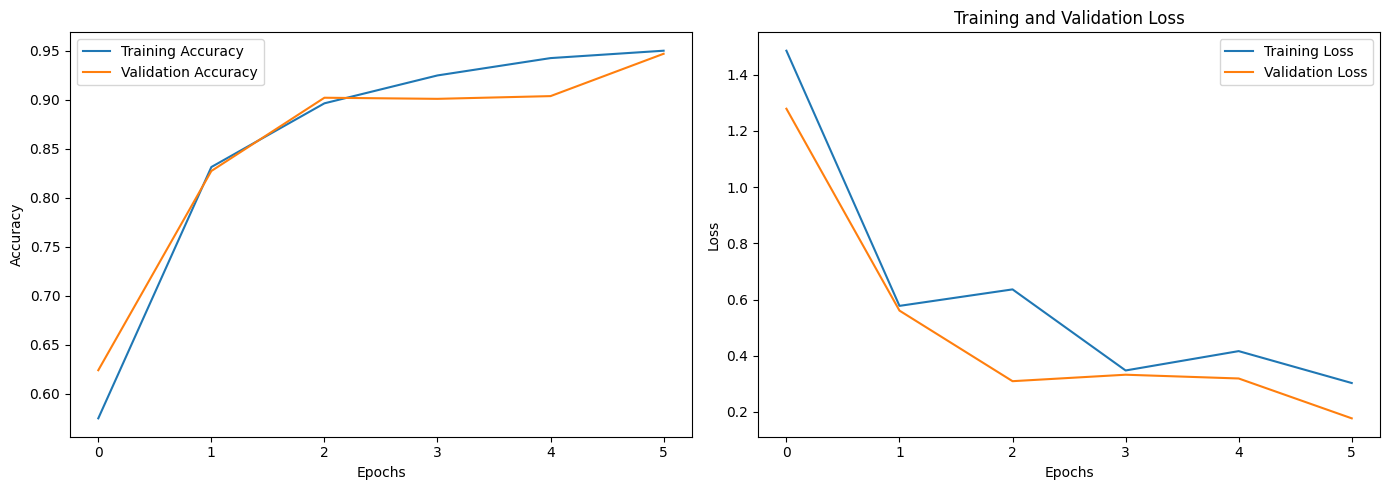

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_history.history['accuracy'], label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
with open('train_history.json','w') as f:
    json.dump(train_history.history, f)

In [13]:
test_set = image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [15]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step


(array([[9.99968767e-01, 5.15579801e-09, 1.09723196e-10, ...,
         6.23507940e-16, 3.67314091e-16, 9.30046242e-14],
        [9.93996978e-01, 1.90447478e-04, 7.61101887e-07, ...,
         1.00885444e-09, 2.12522022e-09, 9.23875254e-10],
        [1.00000000e+00, 1.34665257e-09, 1.62178639e-11, ...,
         1.60242633e-16, 2.21987536e-15, 4.02540458e-12],
        ...,
        [1.57037203e-10, 3.88289336e-13, 3.24071985e-11, ...,
         1.04017808e-10, 2.11546388e-11, 9.99998808e-01],
        [1.03595552e-11, 1.63709562e-15, 2.51490370e-13, ...,
         4.81883305e-13, 1.72819539e-14, 1.00000000e+00],
        [4.92848594e-14, 9.27120167e-15, 9.32870843e-15, ...,
         2.01414503e-15, 1.50205348e-15, 9.99999523e-01]], dtype=float32),
 (17572, 38))

In [16]:
pred_cat = tf.argmax(y_pred, axis = 1)
pred_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [17]:
real_cat = tf.concat([y for x, y in test_set], axis = 0)
real_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [18]:
y_true = tf.argmax(real_cat, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [19]:
class_name = valid_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [20]:
print(classification_report(y_true, pred_cat, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.87      0.92       504
                                 Apple___Black_rot       0.98      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       0.93      0.95      0.94       502
                               Blueberry___healthy       0.88      1.00      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.98      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.92      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

In [21]:
conf_mat = confusion_matrix(y_true, pred_cat)
conf_mat

array([[437,   4,   1, ...,   0,   0,   1],
       [  0, 477,   0, ...,   0,   0,   0],
       [  0,   0, 417, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 473,   0,   0],
       [  0,   0,   0, ...,   0, 421,   0],
       [  0,   0,   0, ...,   0,   0, 474]])

<Axes: >

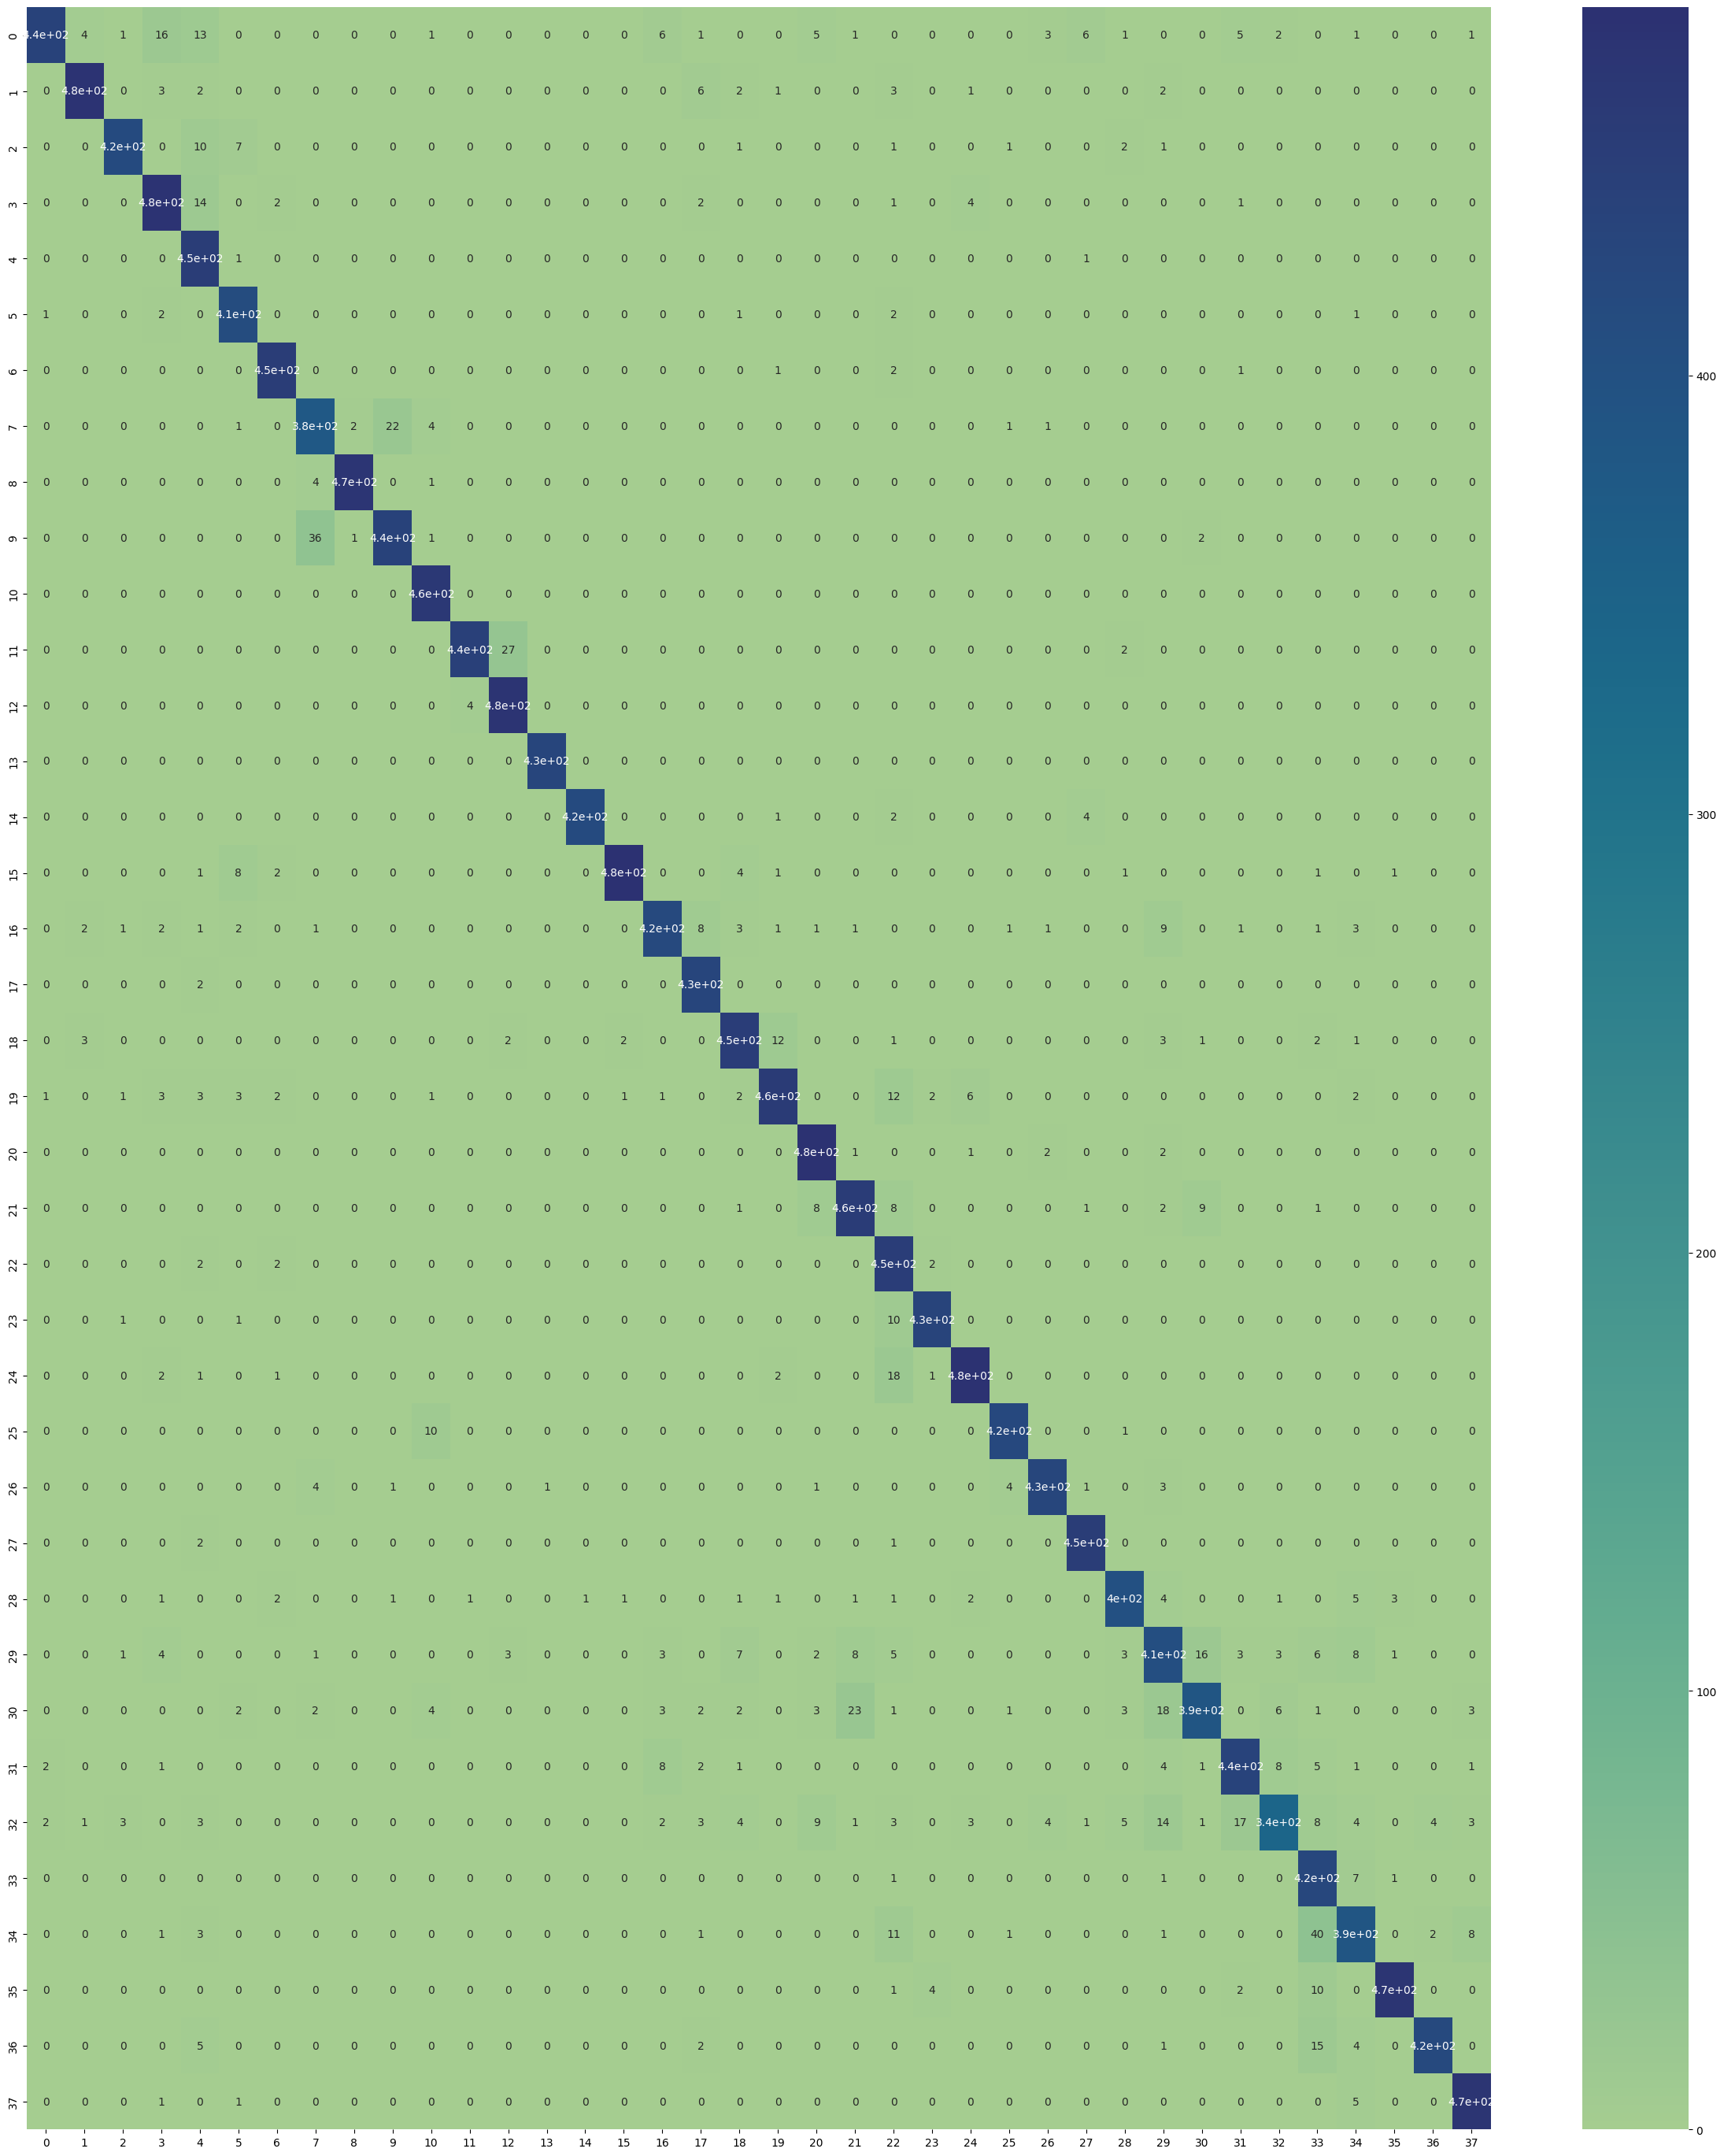

In [22]:
plt.figure(figsize = (30,35))
sns.heatmap(conf_mat, annot=True,cmap='crest')